# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 47kB/s  eta 0:00:01 3% |█▏                              | 512kB 6.2MB/s eta 0:00:03
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

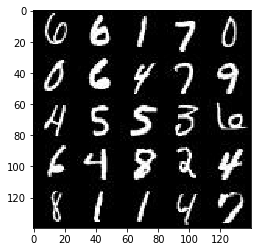

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

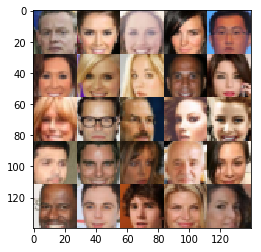

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_images=tf.placeholder(dtype=tf.float32,shape=(None,image_width,image_height,image_channels),name='input_images')
    z_tensor=tf.placeholder(dtype=tf.float32,shape=(None,z_dim),name='z_tensor')
    learning_rate=tf.placeholder(dtype=tf.float32,name='learning_rate')
    return  input_images, z_tensor, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False,alpha=0.07 ,dropout=0.8):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator',reuse=reuse):
        x1=tf.layers.conv2d(images,64,5,strides=2,padding='same')
        relu1=tf.maximum(alpha*x1,x1)
        x2=tf.layers.conv2d(relu1,128,5,strides=2,padding='same')
        bn1=tf.layers.batch_normalization(x2,training=True)
        relu2=tf.maximum(alpha*bn1,bn1)
        x3=tf.layers.conv2d(relu2,256,5,strides=2,padding='same')
        bn2=tf.layers.batch_normalization(x3,training=True)
        relu3=tf.maximum(alpha*bn2,bn2)
        flat=tf.reshape(relu3,(-1,4*4*256))
        dropout_layer = tf.layers.dropout(inputs=flat, rate=dropout)
        logits=tf.layers.dense(dropout_layer, 1)
        out=tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True,alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        x1=tf.layers.dense(z,(3*3*512))
        x1=tf.reshape(x1,(-1,3,3,512))
        bn1=tf.layers.batch_normalization(x1,training=is_train)
        relu1=tf.maximum(alpha*bn1,bn1)
        x2=tf.layers.conv2d_transpose(relu1,256,4,strides=2,padding='same')
        bn2=tf.layers.batch_normalization(x2,training=is_train)
        relu2=tf.maximum(alpha*bn2,bn2)
        x3=tf.layers.conv2d_transpose(relu2,128,4,strides=2,padding='valid')
        bn2=tf.layers.batch_normalization(x3,training=is_train)
        relu3=tf.maximum(alpha*bn2,bn2)
        logits=tf.layers.conv2d_transpose(relu3,out_channel_dim, kernel_size=5,strides=2,padding='same')
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim,alpha=0.2,dropout=0.8, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim,is_train=True,alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real,dropout=dropout)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True,dropout=dropout)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1 - smooth)) )
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [i for i in t_vars if i.name.startswith('discriminator')]
    g_vars = [i for i in t_vars if i.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    
    # TODO: Build Model
    alpha = 0.2
    n_samples, image_width, image_height, image_channels = data_shape
    input_images, z_tensor, l_r=model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss=model_loss(input_images, z_tensor, image_channels,alpha=alpha)
    d_train_opt, g_train_opt=model_opt(d_loss, g_loss, learning_rate, beta1)
    step = 0
    print_loss_every = 10
    show_image_every = 50
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                step +=1
                
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                sess.run(d_train_opt, feed_dict={input_images: batch_images, z_tensor: batch_z, l_r:learning_rate})
                sess.run(g_train_opt, feed_dict={input_images: batch_images, z_tensor: batch_z, l_r:learning_rate})
                
                
                if step % print_loss_every == 0:
                    train_loss_d = d_loss.eval({z_tensor: batch_z, input_images: batch_images})
                    train_loss_g = g_loss.eval({z_tensor: batch_z})
                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if step % show_image_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, z_tensor, image_channels, data_image_mode)
                    


                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 0.8260... Generator Loss: 1.6103
Epoch 0/2... Discriminator Loss: 1.9567... Generator Loss: 6.5118
Epoch 0/2... Discriminator Loss: 0.8504... Generator Loss: 4.1643
Epoch 0/2... Discriminator Loss: 0.9404... Generator Loss: 1.8447
Epoch 0/2... Discriminator Loss: 0.8506... Generator Loss: 2.1259


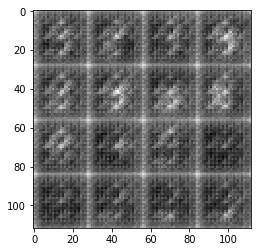

Epoch 0/2... Discriminator Loss: 0.8219... Generator Loss: 1.4063
Epoch 0/2... Discriminator Loss: 1.2406... Generator Loss: 2.0071
Epoch 0/2... Discriminator Loss: 2.1239... Generator Loss: 0.2844
Epoch 0/2... Discriminator Loss: 1.2419... Generator Loss: 0.9073
Epoch 0/2... Discriminator Loss: 1.4429... Generator Loss: 1.6048


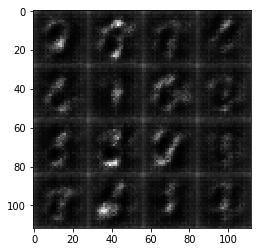

Epoch 0/2... Discriminator Loss: 1.4336... Generator Loss: 0.5162
Epoch 0/2... Discriminator Loss: 2.0289... Generator Loss: 0.2478
Epoch 0/2... Discriminator Loss: 1.1865... Generator Loss: 1.5947
Epoch 0/2... Discriminator Loss: 1.3650... Generator Loss: 0.4952
Epoch 0/2... Discriminator Loss: 1.0936... Generator Loss: 0.8923


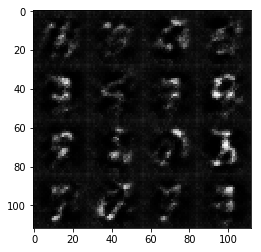

Epoch 0/2... Discriminator Loss: 1.2467... Generator Loss: 1.6886
Epoch 0/2... Discriminator Loss: 1.0954... Generator Loss: 0.8671
Epoch 0/2... Discriminator Loss: 1.3622... Generator Loss: 2.0613
Epoch 0/2... Discriminator Loss: 1.2595... Generator Loss: 2.3675
Epoch 0/2... Discriminator Loss: 0.9352... Generator Loss: 1.5807


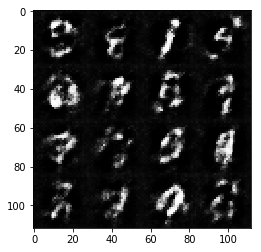

Epoch 0/2... Discriminator Loss: 1.0331... Generator Loss: 2.2243
Epoch 0/2... Discriminator Loss: 0.9483... Generator Loss: 1.8770
Epoch 0/2... Discriminator Loss: 0.9621... Generator Loss: 0.9697
Epoch 0/2... Discriminator Loss: 1.0092... Generator Loss: 0.9387
Epoch 0/2... Discriminator Loss: 1.0069... Generator Loss: 0.9179


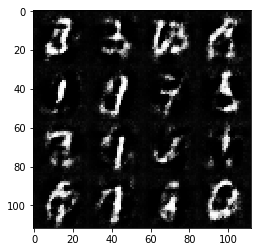

Epoch 0/2... Discriminator Loss: 1.8858... Generator Loss: 0.3453
Epoch 0/2... Discriminator Loss: 0.9269... Generator Loss: 1.5064
Epoch 0/2... Discriminator Loss: 1.4751... Generator Loss: 2.4335
Epoch 0/2... Discriminator Loss: 1.1961... Generator Loss: 0.7210
Epoch 0/2... Discriminator Loss: 1.5938... Generator Loss: 0.4039


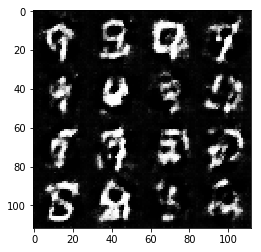

Epoch 0/2... Discriminator Loss: 1.7110... Generator Loss: 0.3589
Epoch 0/2... Discriminator Loss: 0.9987... Generator Loss: 1.4842
Epoch 0/2... Discriminator Loss: 1.5543... Generator Loss: 0.4073
Epoch 0/2... Discriminator Loss: 0.8877... Generator Loss: 1.0927
Epoch 0/2... Discriminator Loss: 1.5220... Generator Loss: 0.4921


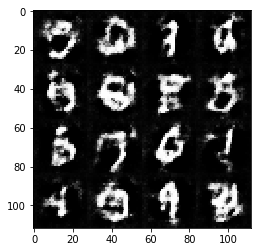

Epoch 0/2... Discriminator Loss: 0.9674... Generator Loss: 1.4797
Epoch 0/2... Discriminator Loss: 1.0830... Generator Loss: 0.8191
Epoch 0/2... Discriminator Loss: 1.0930... Generator Loss: 0.8943
Epoch 0/2... Discriminator Loss: 0.8656... Generator Loss: 1.4499
Epoch 0/2... Discriminator Loss: 1.2046... Generator Loss: 0.6461


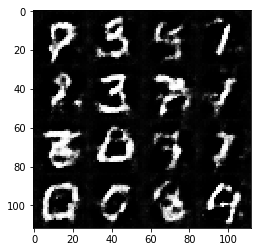

Epoch 0/2... Discriminator Loss: 0.8618... Generator Loss: 1.2375
Epoch 0/2... Discriminator Loss: 0.8970... Generator Loss: 1.7029
Epoch 0/2... Discriminator Loss: 0.9590... Generator Loss: 1.0159
Epoch 0/2... Discriminator Loss: 1.7719... Generator Loss: 0.3109
Epoch 0/2... Discriminator Loss: 0.9311... Generator Loss: 1.5684


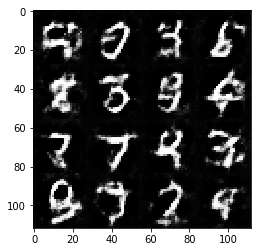

Epoch 0/2... Discriminator Loss: 1.0390... Generator Loss: 1.5522
Epoch 0/2... Discriminator Loss: 0.9761... Generator Loss: 0.9353
Epoch 0/2... Discriminator Loss: 0.8719... Generator Loss: 1.4565
Epoch 0/2... Discriminator Loss: 1.3768... Generator Loss: 2.4352
Epoch 0/2... Discriminator Loss: 0.8729... Generator Loss: 1.6097


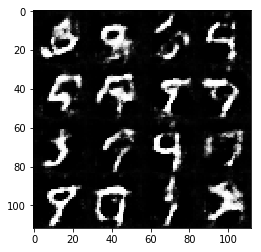

Epoch 0/2... Discriminator Loss: 1.2082... Generator Loss: 0.6658
Epoch 0/2... Discriminator Loss: 1.2145... Generator Loss: 0.6169
Epoch 0/2... Discriminator Loss: 1.1062... Generator Loss: 0.7241
Epoch 0/2... Discriminator Loss: 1.4548... Generator Loss: 0.4491
Epoch 0/2... Discriminator Loss: 0.9327... Generator Loss: 0.9660


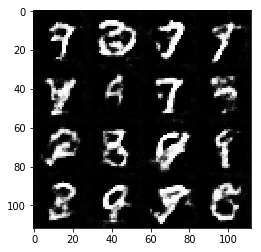

Epoch 0/2... Discriminator Loss: 0.8168... Generator Loss: 1.3926
Epoch 0/2... Discriminator Loss: 0.9350... Generator Loss: 1.7143
Epoch 0/2... Discriminator Loss: 0.9209... Generator Loss: 1.6908
Epoch 0/2... Discriminator Loss: 0.9350... Generator Loss: 1.4943
Epoch 0/2... Discriminator Loss: 0.8587... Generator Loss: 2.2202


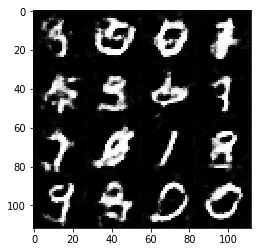

Epoch 0/2... Discriminator Loss: 1.0232... Generator Loss: 1.2041
Epoch 0/2... Discriminator Loss: 1.6237... Generator Loss: 0.3891
Epoch 0/2... Discriminator Loss: 1.1121... Generator Loss: 0.7101
Epoch 0/2... Discriminator Loss: 0.9380... Generator Loss: 1.0833
Epoch 0/2... Discriminator Loss: 1.0228... Generator Loss: 1.1601


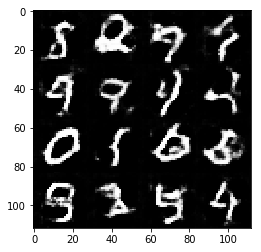

Epoch 0/2... Discriminator Loss: 0.9509... Generator Loss: 0.9793
Epoch 0/2... Discriminator Loss: 1.1186... Generator Loss: 0.7470
Epoch 0/2... Discriminator Loss: 1.1964... Generator Loss: 2.6404
Epoch 0/2... Discriminator Loss: 0.8814... Generator Loss: 1.4474
Epoch 0/2... Discriminator Loss: 0.8784... Generator Loss: 1.2654


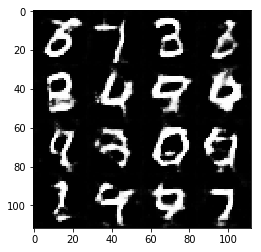

Epoch 0/2... Discriminator Loss: 0.8506... Generator Loss: 1.3805
Epoch 0/2... Discriminator Loss: 0.9264... Generator Loss: 1.6514
Epoch 0/2... Discriminator Loss: 1.7973... Generator Loss: 0.3305
Epoch 0/2... Discriminator Loss: 1.2474... Generator Loss: 0.6285
Epoch 0/2... Discriminator Loss: 1.3729... Generator Loss: 0.5243


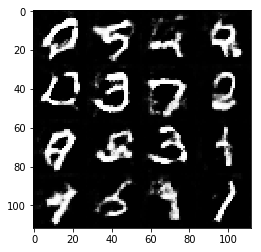

Epoch 0/2... Discriminator Loss: 1.0704... Generator Loss: 1.7316
Epoch 0/2... Discriminator Loss: 0.9094... Generator Loss: 1.1565
Epoch 0/2... Discriminator Loss: 1.0287... Generator Loss: 2.3555
Epoch 0/2... Discriminator Loss: 0.9675... Generator Loss: 0.9381
Epoch 0/2... Discriminator Loss: 0.7794... Generator Loss: 1.2815


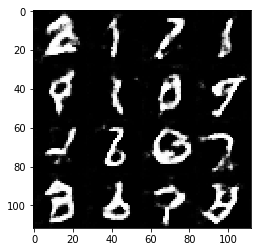

Epoch 0/2... Discriminator Loss: 1.2721... Generator Loss: 0.6168
Epoch 0/2... Discriminator Loss: 1.0402... Generator Loss: 0.7778
Epoch 0/2... Discriminator Loss: 1.0138... Generator Loss: 0.8680
Epoch 0/2... Discriminator Loss: 1.6263... Generator Loss: 0.4172
Epoch 0/2... Discriminator Loss: 1.8452... Generator Loss: 0.3258


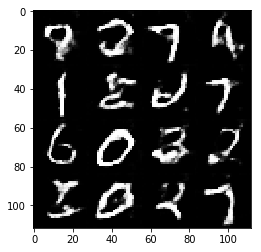

Epoch 0/2... Discriminator Loss: 0.8070... Generator Loss: 1.4166
Epoch 0/2... Discriminator Loss: 0.8484... Generator Loss: 1.0926
Epoch 0/2... Discriminator Loss: 1.1836... Generator Loss: 0.7012
Epoch 0/2... Discriminator Loss: 1.0357... Generator Loss: 0.7895
Epoch 0/2... Discriminator Loss: 0.8511... Generator Loss: 1.2007


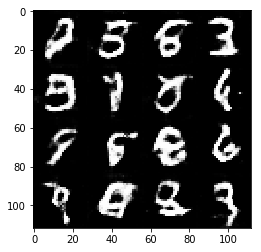

Epoch 0/2... Discriminator Loss: 1.8605... Generator Loss: 0.3347
Epoch 0/2... Discriminator Loss: 0.7879... Generator Loss: 1.2812
Epoch 0/2... Discriminator Loss: 2.8565... Generator Loss: 0.1574
Epoch 0/2... Discriminator Loss: 0.8968... Generator Loss: 0.9761
Epoch 0/2... Discriminator Loss: 0.8907... Generator Loss: 1.0659


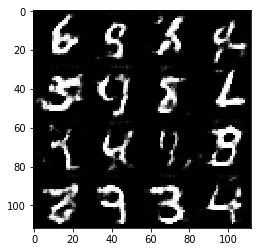

Epoch 0/2... Discriminator Loss: 0.7799... Generator Loss: 1.3092
Epoch 0/2... Discriminator Loss: 0.7945... Generator Loss: 1.1655
Epoch 0/2... Discriminator Loss: 0.6615... Generator Loss: 2.0441
Epoch 0/2... Discriminator Loss: 0.9304... Generator Loss: 0.9406
Epoch 0/2... Discriminator Loss: 1.0476... Generator Loss: 0.7656


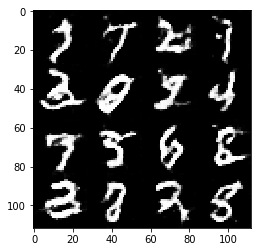

Epoch 0/2... Discriminator Loss: 0.6441... Generator Loss: 1.6743
Epoch 0/2... Discriminator Loss: 2.0001... Generator Loss: 3.8818
Epoch 0/2... Discriminator Loss: 0.8379... Generator Loss: 1.2663
Epoch 0/2... Discriminator Loss: 1.4455... Generator Loss: 0.4675
Epoch 0/2... Discriminator Loss: 0.7897... Generator Loss: 1.1892


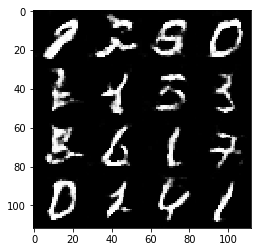

Epoch 0/2... Discriminator Loss: 0.9581... Generator Loss: 0.9323
Epoch 0/2... Discriminator Loss: 0.7647... Generator Loss: 2.8527
Epoch 0/2... Discriminator Loss: 2.3995... Generator Loss: 0.1825
Epoch 0/2... Discriminator Loss: 1.0114... Generator Loss: 0.8246
Epoch 0/2... Discriminator Loss: 0.7415... Generator Loss: 1.6170


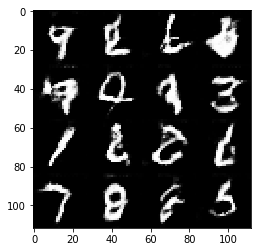

Epoch 0/2... Discriminator Loss: 1.3693... Generator Loss: 0.5309
Epoch 0/2... Discriminator Loss: 1.2088... Generator Loss: 0.7574
Epoch 0/2... Discriminator Loss: 0.7887... Generator Loss: 1.5204
Epoch 0/2... Discriminator Loss: 1.0060... Generator Loss: 0.8084
Epoch 0/2... Discriminator Loss: 0.9621... Generator Loss: 0.8906


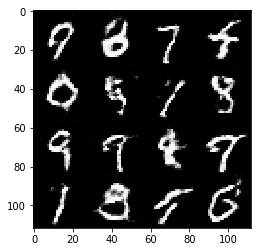

Epoch 0/2... Discriminator Loss: 0.9634... Generator Loss: 1.0483
Epoch 0/2... Discriminator Loss: 0.6880... Generator Loss: 1.4776
Epoch 0/2... Discriminator Loss: 0.7045... Generator Loss: 1.7987
Epoch 0/2... Discriminator Loss: 1.1764... Generator Loss: 2.2560
Epoch 0/2... Discriminator Loss: 1.1547... Generator Loss: 0.6999


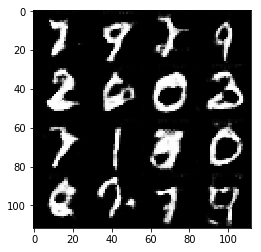

Epoch 0/2... Discriminator Loss: 0.8471... Generator Loss: 1.2365
Epoch 0/2... Discriminator Loss: 0.8624... Generator Loss: 1.0298
Epoch 0/2... Discriminator Loss: 0.9132... Generator Loss: 0.9154
Epoch 0/2... Discriminator Loss: 0.8856... Generator Loss: 1.0508
Epoch 0/2... Discriminator Loss: 1.0182... Generator Loss: 0.9066


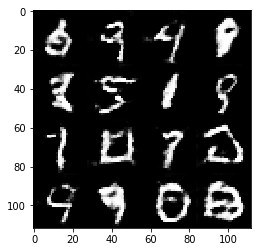

Epoch 0/2... Discriminator Loss: 1.4052... Generator Loss: 0.5324
Epoch 0/2... Discriminator Loss: 1.1061... Generator Loss: 0.7709
Epoch 0/2... Discriminator Loss: 0.9070... Generator Loss: 1.1001
Epoch 0/2... Discriminator Loss: 0.9816... Generator Loss: 0.8587
Epoch 0/2... Discriminator Loss: 0.6297... Generator Loss: 1.6566


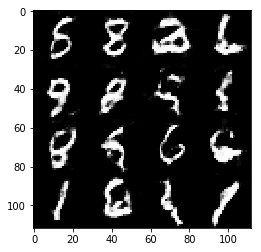

Epoch 0/2... Discriminator Loss: 1.0261... Generator Loss: 0.8501
Epoch 0/2... Discriminator Loss: 1.7262... Generator Loss: 0.4293
Epoch 0/2... Discriminator Loss: 0.8023... Generator Loss: 1.2469
Epoch 0/2... Discriminator Loss: 1.0060... Generator Loss: 0.8304
Epoch 0/2... Discriminator Loss: 0.8912... Generator Loss: 1.1420


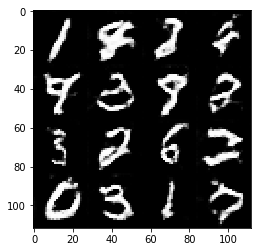

Epoch 0/2... Discriminator Loss: 1.0354... Generator Loss: 0.8785
Epoch 0/2... Discriminator Loss: 0.9261... Generator Loss: 0.9886
Epoch 0/2... Discriminator Loss: 2.3961... Generator Loss: 5.2136
Epoch 0/2... Discriminator Loss: 1.2161... Generator Loss: 0.6297
Epoch 0/2... Discriminator Loss: 1.4170... Generator Loss: 0.5732


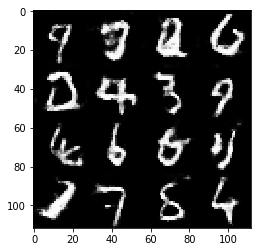

Epoch 0/2... Discriminator Loss: 1.0051... Generator Loss: 0.8674
Epoch 0/2... Discriminator Loss: 0.7051... Generator Loss: 1.5616
Epoch 0/2... Discriminator Loss: 0.6359... Generator Loss: 1.4689
Epoch 0/2... Discriminator Loss: 0.7553... Generator Loss: 1.2848
Epoch 0/2... Discriminator Loss: 0.7314... Generator Loss: 1.8599


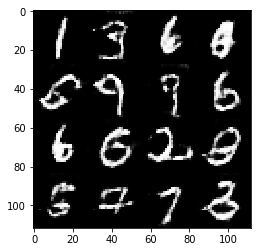

Epoch 0/2... Discriminator Loss: 1.1960... Generator Loss: 0.6394
Epoch 0/2... Discriminator Loss: 0.8077... Generator Loss: 1.9171
Epoch 0/2... Discriminator Loss: 0.8541... Generator Loss: 1.1346
Epoch 0/2... Discriminator Loss: 0.7617... Generator Loss: 1.2996
Epoch 0/2... Discriminator Loss: 1.8063... Generator Loss: 0.3460


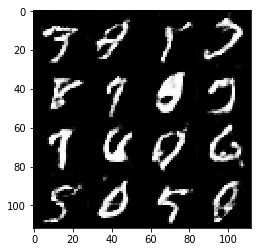

Epoch 0/2... Discriminator Loss: 1.1320... Generator Loss: 0.7502
Epoch 0/2... Discriminator Loss: 0.7368... Generator Loss: 1.2656
Epoch 0/2... Discriminator Loss: 2.2541... Generator Loss: 4.8844
Epoch 0/2... Discriminator Loss: 1.2130... Generator Loss: 0.6476
Epoch 0/2... Discriminator Loss: 0.7066... Generator Loss: 1.6682


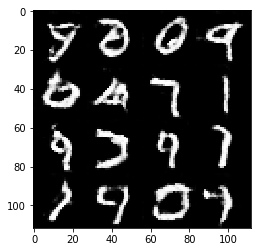

Epoch 0/2... Discriminator Loss: 1.1049... Generator Loss: 0.7715
Epoch 0/2... Discriminator Loss: 0.8549... Generator Loss: 1.0400
Epoch 0/2... Discriminator Loss: 0.8109... Generator Loss: 1.0952
Epoch 0/2... Discriminator Loss: 0.8664... Generator Loss: 1.1151
Epoch 0/2... Discriminator Loss: 0.6306... Generator Loss: 1.7827


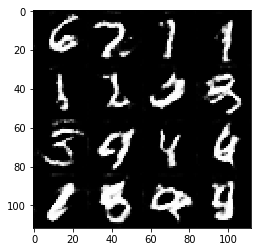

Epoch 0/2... Discriminator Loss: 0.6551... Generator Loss: 1.5698
Epoch 0/2... Discriminator Loss: 0.7063... Generator Loss: 1.4411
Epoch 0/2... Discriminator Loss: 0.8545... Generator Loss: 1.1169
Epoch 0/2... Discriminator Loss: 1.5692... Generator Loss: 3.9871
Epoch 0/2... Discriminator Loss: 0.9015... Generator Loss: 2.6869


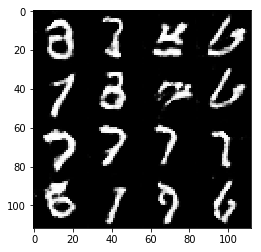

Epoch 0/2... Discriminator Loss: 0.7415... Generator Loss: 1.3197
Epoch 0/2... Discriminator Loss: 0.7824... Generator Loss: 1.2238
Epoch 0/2... Discriminator Loss: 0.8125... Generator Loss: 1.0922
Epoch 0/2... Discriminator Loss: 0.6461... Generator Loss: 1.5477
Epoch 0/2... Discriminator Loss: 0.6963... Generator Loss: 1.4179


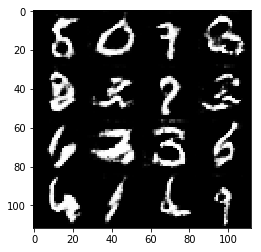

Epoch 0/2... Discriminator Loss: 1.0577... Generator Loss: 2.2752
Epoch 0/2... Discriminator Loss: 1.2715... Generator Loss: 0.6627
Epoch 0/2... Discriminator Loss: 0.7425... Generator Loss: 1.3196
Epoch 0/2... Discriminator Loss: 0.8000... Generator Loss: 1.1461
Epoch 0/2... Discriminator Loss: 0.8568... Generator Loss: 1.1589


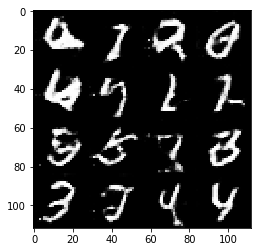

Epoch 0/2... Discriminator Loss: 0.5367... Generator Loss: 2.1812
Epoch 0/2... Discriminator Loss: 1.2887... Generator Loss: 0.6971
Epoch 0/2... Discriminator Loss: 0.6909... Generator Loss: 1.4732
Epoch 0/2... Discriminator Loss: 0.8217... Generator Loss: 2.1075
Epoch 0/2... Discriminator Loss: 0.7114... Generator Loss: 1.5359


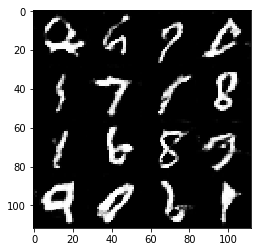

Epoch 0/2... Discriminator Loss: 1.1955... Generator Loss: 0.7478
Epoch 0/2... Discriminator Loss: 1.0271... Generator Loss: 2.8518
Epoch 0/2... Discriminator Loss: 0.7946... Generator Loss: 1.1276
Epoch 0/2... Discriminator Loss: 0.8900... Generator Loss: 0.9953
Epoch 0/2... Discriminator Loss: 0.9050... Generator Loss: 1.0014


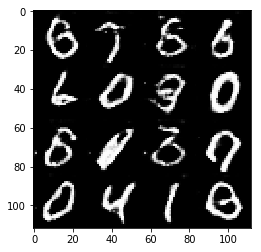

Epoch 0/2... Discriminator Loss: 0.6794... Generator Loss: 1.6024
Epoch 0/2... Discriminator Loss: 0.7389... Generator Loss: 1.3459
Epoch 1/2... Discriminator Loss: 0.7412... Generator Loss: 1.3360
Epoch 1/2... Discriminator Loss: 1.2008... Generator Loss: 0.7847
Epoch 1/2... Discriminator Loss: 0.9583... Generator Loss: 0.9644


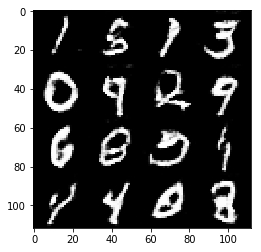

Epoch 1/2... Discriminator Loss: 1.5582... Generator Loss: 0.4757
Epoch 1/2... Discriminator Loss: 1.3368... Generator Loss: 2.8808
Epoch 1/2... Discriminator Loss: 0.8798... Generator Loss: 0.9800
Epoch 1/2... Discriminator Loss: 0.6784... Generator Loss: 1.7920
Epoch 1/2... Discriminator Loss: 0.6555... Generator Loss: 1.4178


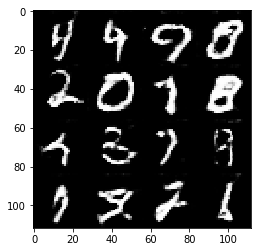

Epoch 1/2... Discriminator Loss: 0.8359... Generator Loss: 1.1572
Epoch 1/2... Discriminator Loss: 1.0131... Generator Loss: 0.9452
Epoch 1/2... Discriminator Loss: 1.3289... Generator Loss: 0.5548
Epoch 1/2... Discriminator Loss: 2.1910... Generator Loss: 0.2578
Epoch 1/2... Discriminator Loss: 0.7081... Generator Loss: 1.5629


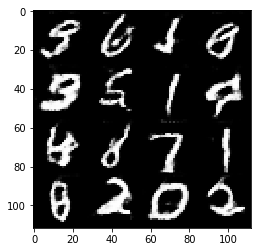

Epoch 1/2... Discriminator Loss: 1.6973... Generator Loss: 0.4809
Epoch 1/2... Discriminator Loss: 0.8156... Generator Loss: 1.1915
Epoch 1/2... Discriminator Loss: 0.6577... Generator Loss: 1.7773
Epoch 1/2... Discriminator Loss: 1.0639... Generator Loss: 0.8302
Epoch 1/2... Discriminator Loss: 1.2420... Generator Loss: 0.7047


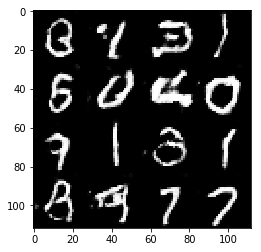

Epoch 1/2... Discriminator Loss: 1.1920... Generator Loss: 0.7025
Epoch 1/2... Discriminator Loss: 0.7151... Generator Loss: 1.4774
Epoch 1/2... Discriminator Loss: 0.9859... Generator Loss: 0.8241
Epoch 1/2... Discriminator Loss: 0.9756... Generator Loss: 2.2713
Epoch 1/2... Discriminator Loss: 1.2626... Generator Loss: 0.5859


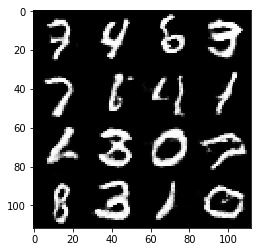

Epoch 1/2... Discriminator Loss: 0.7623... Generator Loss: 1.2357
Epoch 1/2... Discriminator Loss: 0.5211... Generator Loss: 2.3029
Epoch 1/2... Discriminator Loss: 0.8360... Generator Loss: 1.2303
Epoch 1/2... Discriminator Loss: 0.6811... Generator Loss: 1.4965
Epoch 1/2... Discriminator Loss: 1.1313... Generator Loss: 0.9351


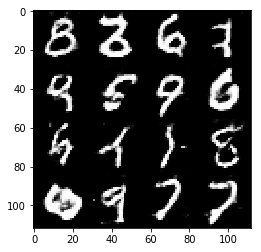

Epoch 1/2... Discriminator Loss: 0.6089... Generator Loss: 1.7768
Epoch 1/2... Discriminator Loss: 0.7530... Generator Loss: 1.4205
Epoch 1/2... Discriminator Loss: 0.9404... Generator Loss: 2.1832
Epoch 1/2... Discriminator Loss: 0.8425... Generator Loss: 1.1699
Epoch 1/2... Discriminator Loss: 0.7087... Generator Loss: 1.5172


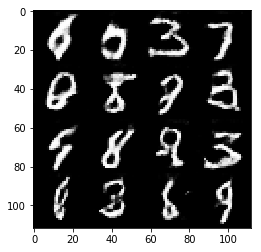

Epoch 1/2... Discriminator Loss: 0.8137... Generator Loss: 1.2454
Epoch 1/2... Discriminator Loss: 0.7418... Generator Loss: 1.3574
Epoch 1/2... Discriminator Loss: 0.7657... Generator Loss: 1.2272
Epoch 1/2... Discriminator Loss: 0.6157... Generator Loss: 1.6116
Epoch 1/2... Discriminator Loss: 1.5096... Generator Loss: 0.4932


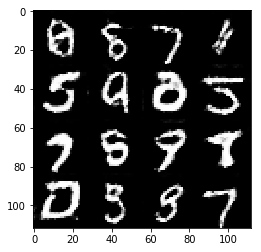

Epoch 1/2... Discriminator Loss: 0.5210... Generator Loss: 2.0814
Epoch 1/2... Discriminator Loss: 1.0403... Generator Loss: 0.9956
Epoch 1/2... Discriminator Loss: 1.0404... Generator Loss: 0.9138
Epoch 1/2... Discriminator Loss: 0.9550... Generator Loss: 0.9795
Epoch 1/2... Discriminator Loss: 2.2919... Generator Loss: 0.2921


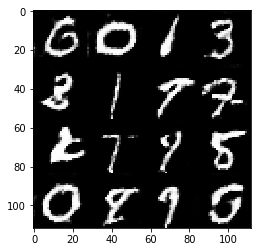

Epoch 1/2... Discriminator Loss: 0.6310... Generator Loss: 1.6369
Epoch 1/2... Discriminator Loss: 0.9945... Generator Loss: 0.9862
Epoch 1/2... Discriminator Loss: 1.5650... Generator Loss: 0.5885
Epoch 1/2... Discriminator Loss: 0.6880... Generator Loss: 1.5249
Epoch 1/2... Discriminator Loss: 0.5863... Generator Loss: 2.3702


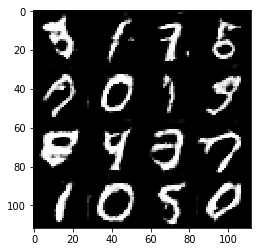

Epoch 1/2... Discriminator Loss: 0.6012... Generator Loss: 1.7002
Epoch 1/2... Discriminator Loss: 0.4822... Generator Loss: 2.4701
Epoch 1/2... Discriminator Loss: 3.6045... Generator Loss: 6.9125
Epoch 1/2... Discriminator Loss: 0.8150... Generator Loss: 1.0991
Epoch 1/2... Discriminator Loss: 1.1522... Generator Loss: 2.8004


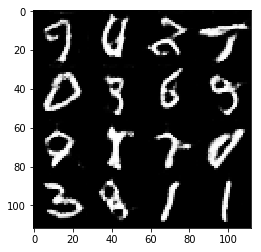

Epoch 1/2... Discriminator Loss: 0.8916... Generator Loss: 1.1705
Epoch 1/2... Discriminator Loss: 1.2574... Generator Loss: 0.6468
Epoch 1/2... Discriminator Loss: 0.6035... Generator Loss: 1.6923
Epoch 1/2... Discriminator Loss: 1.1087... Generator Loss: 0.7217
Epoch 1/2... Discriminator Loss: 0.9089... Generator Loss: 1.0210


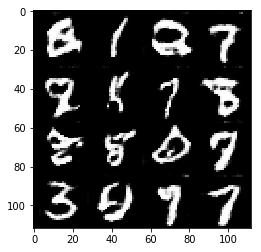

Epoch 1/2... Discriminator Loss: 0.6303... Generator Loss: 1.6377
Epoch 1/2... Discriminator Loss: 0.8432... Generator Loss: 1.1440
Epoch 1/2... Discriminator Loss: 0.8252... Generator Loss: 1.1476
Epoch 1/2... Discriminator Loss: 1.2012... Generator Loss: 0.6751
Epoch 1/2... Discriminator Loss: 1.1765... Generator Loss: 0.6402


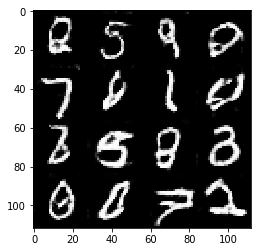

Epoch 1/2... Discriminator Loss: 0.7432... Generator Loss: 2.8228
Epoch 1/2... Discriminator Loss: 0.8640... Generator Loss: 1.0710
Epoch 1/2... Discriminator Loss: 0.9462... Generator Loss: 0.9706
Epoch 1/2... Discriminator Loss: 0.8172... Generator Loss: 1.2222
Epoch 1/2... Discriminator Loss: 1.1982... Generator Loss: 0.7097


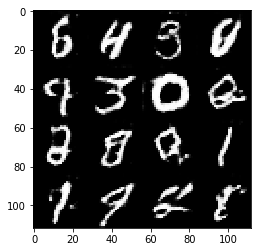

Epoch 1/2... Discriminator Loss: 0.9040... Generator Loss: 1.0433
Epoch 1/2... Discriminator Loss: 0.8626... Generator Loss: 1.1300
Epoch 1/2... Discriminator Loss: 1.2070... Generator Loss: 0.8081
Epoch 1/2... Discriminator Loss: 0.8301... Generator Loss: 2.6573
Epoch 1/2... Discriminator Loss: 0.5875... Generator Loss: 1.8816


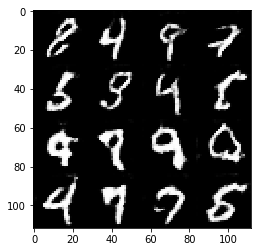

Epoch 1/2... Discriminator Loss: 0.7443... Generator Loss: 1.2949
Epoch 1/2... Discriminator Loss: 1.0587... Generator Loss: 0.8210
Epoch 1/2... Discriminator Loss: 1.0750... Generator Loss: 0.7837
Epoch 1/2... Discriminator Loss: 1.1707... Generator Loss: 0.7893
Epoch 1/2... Discriminator Loss: 0.6138... Generator Loss: 1.6121


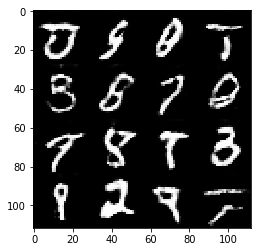

Epoch 1/2... Discriminator Loss: 0.6925... Generator Loss: 1.4337
Epoch 1/2... Discriminator Loss: 0.9639... Generator Loss: 3.8948
Epoch 1/2... Discriminator Loss: 0.6258... Generator Loss: 2.2193
Epoch 1/2... Discriminator Loss: 0.5024... Generator Loss: 2.1187
Epoch 1/2... Discriminator Loss: 1.1247... Generator Loss: 0.8071


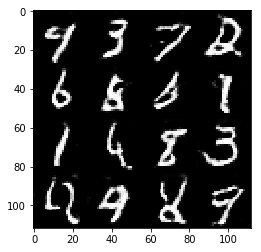

Epoch 1/2... Discriminator Loss: 0.5835... Generator Loss: 2.2202
Epoch 1/2... Discriminator Loss: 0.5899... Generator Loss: 1.7590
Epoch 1/2... Discriminator Loss: 0.5365... Generator Loss: 2.0591
Epoch 1/2... Discriminator Loss: 0.6609... Generator Loss: 1.6430
Epoch 1/2... Discriminator Loss: 0.6393... Generator Loss: 1.6343


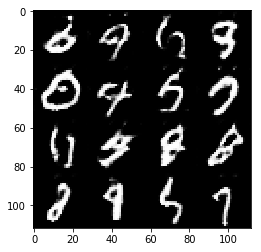

Epoch 1/2... Discriminator Loss: 0.8823... Generator Loss: 1.1347
Epoch 1/2... Discriminator Loss: 0.6020... Generator Loss: 1.8151
Epoch 1/2... Discriminator Loss: 0.6021... Generator Loss: 1.7681
Epoch 1/2... Discriminator Loss: 0.5863... Generator Loss: 1.7210
Epoch 1/2... Discriminator Loss: 0.8461... Generator Loss: 1.1032


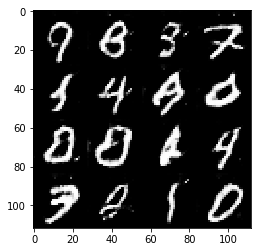

Epoch 1/2... Discriminator Loss: 0.5949... Generator Loss: 1.9135
Epoch 1/2... Discriminator Loss: 2.6020... Generator Loss: 5.4919
Epoch 1/2... Discriminator Loss: 0.6729... Generator Loss: 1.7348
Epoch 1/2... Discriminator Loss: 0.5209... Generator Loss: 2.2273
Epoch 1/2... Discriminator Loss: 0.6766... Generator Loss: 1.4111


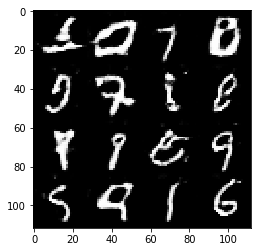

Epoch 1/2... Discriminator Loss: 0.5881... Generator Loss: 2.5098
Epoch 1/2... Discriminator Loss: 0.5418... Generator Loss: 2.0588
Epoch 1/2... Discriminator Loss: 0.6138... Generator Loss: 1.6935
Epoch 1/2... Discriminator Loss: 0.8041... Generator Loss: 1.1683
Epoch 1/2... Discriminator Loss: 0.8285... Generator Loss: 1.2716


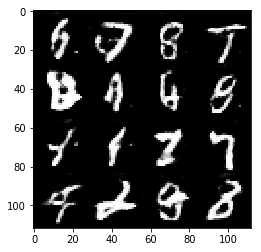

Epoch 1/2... Discriminator Loss: 0.7844... Generator Loss: 1.3624
Epoch 1/2... Discriminator Loss: 0.5998... Generator Loss: 1.7037
Epoch 1/2... Discriminator Loss: 0.4995... Generator Loss: 2.0321
Epoch 1/2... Discriminator Loss: 0.7100... Generator Loss: 1.5530
Epoch 1/2... Discriminator Loss: 1.9561... Generator Loss: 0.3364


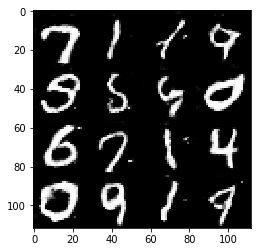

Epoch 1/2... Discriminator Loss: 1.9788... Generator Loss: 0.3441
Epoch 1/2... Discriminator Loss: 0.5279... Generator Loss: 2.0578
Epoch 1/2... Discriminator Loss: 0.5040... Generator Loss: 2.2677
Epoch 1/2... Discriminator Loss: 0.8520... Generator Loss: 1.3052
Epoch 1/2... Discriminator Loss: 0.5498... Generator Loss: 1.9172


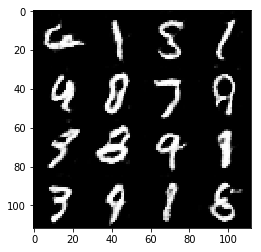

Epoch 1/2... Discriminator Loss: 0.8171... Generator Loss: 1.1744
Epoch 1/2... Discriminator Loss: 0.9871... Generator Loss: 1.0481
Epoch 1/2... Discriminator Loss: 0.6170... Generator Loss: 1.6605
Epoch 1/2... Discriminator Loss: 0.5915... Generator Loss: 1.6758
Epoch 1/2... Discriminator Loss: 0.4639... Generator Loss: 2.4985


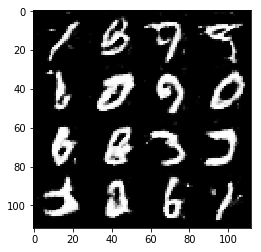

Epoch 1/2... Discriminator Loss: 0.6420... Generator Loss: 2.1159
Epoch 1/2... Discriminator Loss: 0.6510... Generator Loss: 2.2830
Epoch 1/2... Discriminator Loss: 0.9791... Generator Loss: 1.1161
Epoch 1/2... Discriminator Loss: 0.6545... Generator Loss: 1.6284
Epoch 1/2... Discriminator Loss: 0.6967... Generator Loss: 1.5323


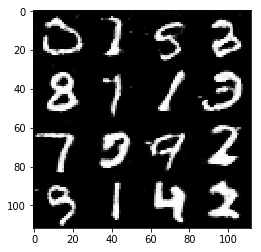

Epoch 1/2... Discriminator Loss: 0.7073... Generator Loss: 1.4855
Epoch 1/2... Discriminator Loss: 0.6571... Generator Loss: 1.4851
Epoch 1/2... Discriminator Loss: 0.6506... Generator Loss: 1.4928
Epoch 1/2... Discriminator Loss: 0.6254... Generator Loss: 1.8496
Epoch 1/2... Discriminator Loss: 0.6966... Generator Loss: 1.4234


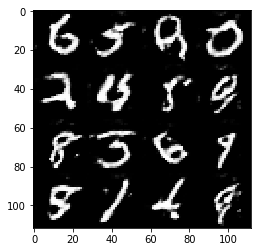

Epoch 1/2... Discriminator Loss: 1.1539... Generator Loss: 0.7348
Epoch 1/2... Discriminator Loss: 1.2376... Generator Loss: 0.7685
Epoch 1/2... Discriminator Loss: 0.5979... Generator Loss: 1.6950
Epoch 1/2... Discriminator Loss: 0.6944... Generator Loss: 1.4215
Epoch 1/2... Discriminator Loss: 0.5121... Generator Loss: 2.4128


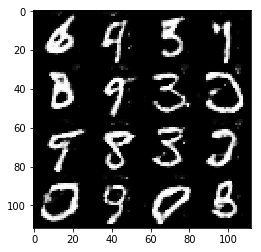

Epoch 1/2... Discriminator Loss: 1.2554... Generator Loss: 0.7228
Epoch 1/2... Discriminator Loss: 0.5591... Generator Loss: 2.0337
Epoch 1/2... Discriminator Loss: 0.5605... Generator Loss: 2.7059
Epoch 1/2... Discriminator Loss: 1.2933... Generator Loss: 0.7531
Epoch 1/2... Discriminator Loss: 0.8224... Generator Loss: 1.2002


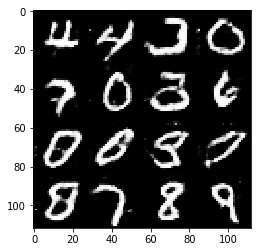

Epoch 1/2... Discriminator Loss: 0.5871... Generator Loss: 2.3919
Epoch 1/2... Discriminator Loss: 1.5644... Generator Loss: 0.4921
Epoch 1/2... Discriminator Loss: 0.7322... Generator Loss: 2.1825
Epoch 1/2... Discriminator Loss: 0.7104... Generator Loss: 1.4480
Epoch 1/2... Discriminator Loss: 0.6672... Generator Loss: 1.5121


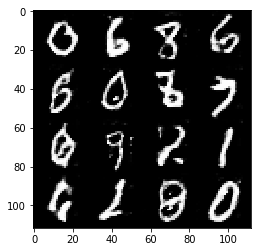

Epoch 1/2... Discriminator Loss: 0.5396... Generator Loss: 1.9803
Epoch 1/2... Discriminator Loss: 0.5347... Generator Loss: 1.9341
Epoch 1/2... Discriminator Loss: 0.6083... Generator Loss: 1.6299
Epoch 1/2... Discriminator Loss: 1.1139... Generator Loss: 0.7743
Epoch 1/2... Discriminator Loss: 3.3074... Generator Loss: 6.1556


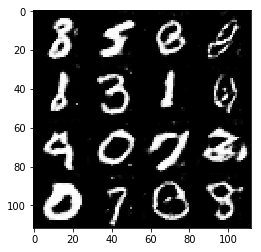

Epoch 1/2... Discriminator Loss: 0.8678... Generator Loss: 1.0431
Epoch 1/2... Discriminator Loss: 0.6612... Generator Loss: 1.6397
Epoch 1/2... Discriminator Loss: 0.6397... Generator Loss: 1.4939
Epoch 1/2... Discriminator Loss: 0.9215... Generator Loss: 1.1161
Epoch 1/2... Discriminator Loss: 0.6545... Generator Loss: 1.6181


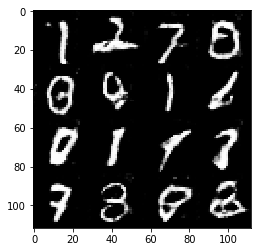

Epoch 1/2... Discriminator Loss: 0.5559... Generator Loss: 2.2267
Epoch 1/2... Discriminator Loss: 0.9591... Generator Loss: 1.0137
Epoch 1/2... Discriminator Loss: 0.5014... Generator Loss: 2.0955
Epoch 1/2... Discriminator Loss: 0.7967... Generator Loss: 3.0632
Epoch 1/2... Discriminator Loss: 0.5428... Generator Loss: 2.5910


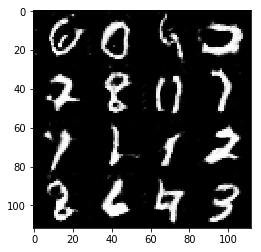

Epoch 1/2... Discriminator Loss: 1.2027... Generator Loss: 0.6997
Epoch 1/2... Discriminator Loss: 0.6160... Generator Loss: 1.7697
Epoch 1/2... Discriminator Loss: 0.6363... Generator Loss: 1.4912
Epoch 1/2... Discriminator Loss: 0.4969... Generator Loss: 2.3328
Epoch 1/2... Discriminator Loss: 0.6851... Generator Loss: 1.4114


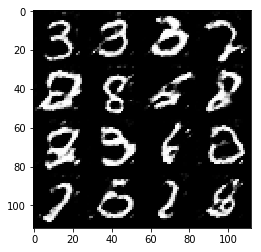

Epoch 1/2... Discriminator Loss: 1.3568... Generator Loss: 0.7628
Epoch 1/2... Discriminator Loss: 0.5474... Generator Loss: 2.5616
Epoch 1/2... Discriminator Loss: 0.5439... Generator Loss: 1.8276
Epoch 1/2... Discriminator Loss: 0.5493... Generator Loss: 1.9062
Epoch 1/2... Discriminator Loss: 0.5160... Generator Loss: 2.2052


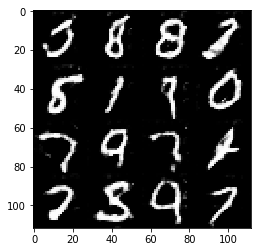

Epoch 1/2... Discriminator Loss: 0.5268... Generator Loss: 2.1143
Epoch 1/2... Discriminator Loss: 0.6552... Generator Loss: 2.0192
Epoch 1/2... Discriminator Loss: 0.5580... Generator Loss: 2.3978
Epoch 1/2... Discriminator Loss: 1.0475... Generator Loss: 0.9412
Epoch 1/2... Discriminator Loss: 1.0411... Generator Loss: 3.0753


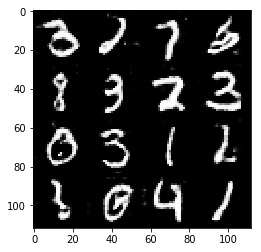

Epoch 1/2... Discriminator Loss: 0.7890... Generator Loss: 1.2309
Epoch 1/2... Discriminator Loss: 0.5156... Generator Loss: 2.1206
Epoch 1/2... Discriminator Loss: 0.9020... Generator Loss: 1.1257
Epoch 1/2... Discriminator Loss: 0.5972... Generator Loss: 1.7283
Epoch 1/2... Discriminator Loss: 0.7279... Generator Loss: 1.4916


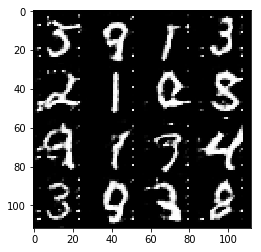

Epoch 1/2... Discriminator Loss: 0.4572... Generator Loss: 2.9958
Epoch 1/2... Discriminator Loss: 0.5906... Generator Loss: 1.8888
Epoch 1/2... Discriminator Loss: 0.5267... Generator Loss: 2.3093
Epoch 1/2... Discriminator Loss: 0.7036... Generator Loss: 1.3827
Epoch 1/2... Discriminator Loss: 0.8041... Generator Loss: 1.2934


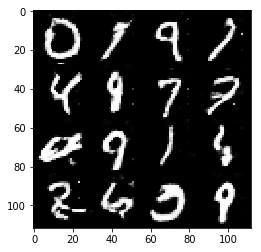

Epoch 1/2... Discriminator Loss: 0.5397... Generator Loss: 1.9465
Epoch 1/2... Discriminator Loss: 0.6269... Generator Loss: 2.7823
Epoch 1/2... Discriminator Loss: 0.5169... Generator Loss: 2.0225
Epoch 1/2... Discriminator Loss: 0.9712... Generator Loss: 0.9561
Epoch 1/2... Discriminator Loss: 1.1960... Generator Loss: 0.8041


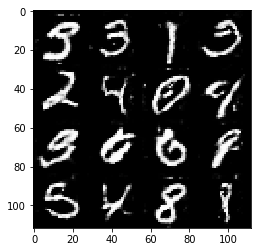

In [12]:
batch_size =32
z_dim =100
learning_rate =.0003
beta1 = .3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 0.9822... Generator Loss: 5.2471
Epoch 0/1... Discriminator Loss: 3.4682... Generator Loss: 0.0637
Epoch 0/1... Discriminator Loss: 1.0292... Generator Loss: 0.9565
Epoch 0/1... Discriminator Loss: 2.3481... Generator Loss: 8.9553
Epoch 0/1... Discriminator Loss: 1.1828... Generator Loss: 1.5321


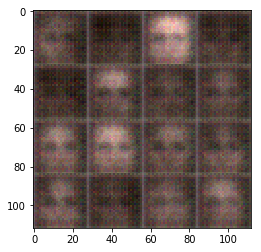

Epoch 0/1... Discriminator Loss: 1.1634... Generator Loss: 2.3564
Epoch 0/1... Discriminator Loss: 1.7939... Generator Loss: 5.1360
Epoch 0/1... Discriminator Loss: 0.8282... Generator Loss: 1.5034
Epoch 0/1... Discriminator Loss: 1.0756... Generator Loss: 0.9199
Epoch 0/1... Discriminator Loss: 0.7685... Generator Loss: 2.5227


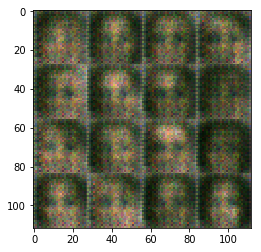

Epoch 0/1... Discriminator Loss: 0.9345... Generator Loss: 1.1743
Epoch 0/1... Discriminator Loss: 1.9431... Generator Loss: 0.3338
Epoch 0/1... Discriminator Loss: 1.0042... Generator Loss: 0.8654
Epoch 0/1... Discriminator Loss: 0.8858... Generator Loss: 1.2221
Epoch 0/1... Discriminator Loss: 0.9381... Generator Loss: 1.0191


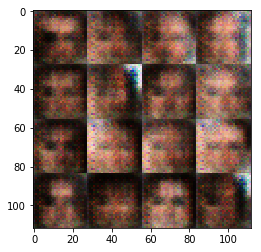

Epoch 0/1... Discriminator Loss: 0.9560... Generator Loss: 1.1614
Epoch 0/1... Discriminator Loss: 0.7901... Generator Loss: 1.2924
Epoch 0/1... Discriminator Loss: 1.0620... Generator Loss: 0.8369
Epoch 0/1... Discriminator Loss: 0.8014... Generator Loss: 1.5073
Epoch 0/1... Discriminator Loss: 1.5400... Generator Loss: 0.5001


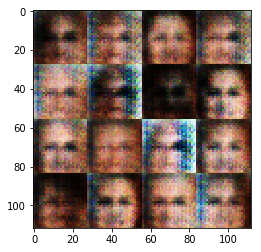

Epoch 0/1... Discriminator Loss: 1.3499... Generator Loss: 0.5658
Epoch 0/1... Discriminator Loss: 1.1977... Generator Loss: 0.6744
Epoch 0/1... Discriminator Loss: 1.1764... Generator Loss: 0.7134
Epoch 0/1... Discriminator Loss: 1.7529... Generator Loss: 0.3187
Epoch 0/1... Discriminator Loss: 1.5871... Generator Loss: 0.3804


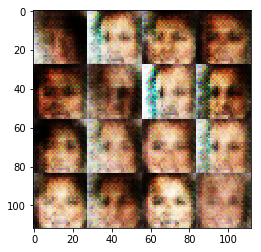

Epoch 0/1... Discriminator Loss: 0.5951... Generator Loss: 1.9076
Epoch 0/1... Discriminator Loss: 0.8941... Generator Loss: 3.1958
Epoch 0/1... Discriminator Loss: 1.0629... Generator Loss: 0.9988
Epoch 0/1... Discriminator Loss: 1.8377... Generator Loss: 0.3875
Epoch 0/1... Discriminator Loss: 1.1644... Generator Loss: 0.7527


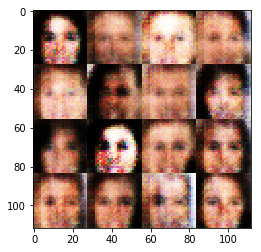

Epoch 0/1... Discriminator Loss: 0.8216... Generator Loss: 1.2838
Epoch 0/1... Discriminator Loss: 1.0479... Generator Loss: 0.8880
Epoch 0/1... Discriminator Loss: 0.6616... Generator Loss: 1.5185
Epoch 0/1... Discriminator Loss: 4.1111... Generator Loss: 5.9385
Epoch 0/1... Discriminator Loss: 0.8424... Generator Loss: 1.3263


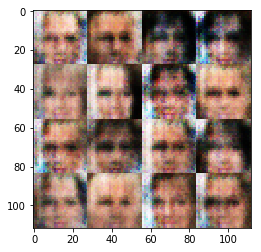

Epoch 0/1... Discriminator Loss: 0.6936... Generator Loss: 2.0451
Epoch 0/1... Discriminator Loss: 0.8865... Generator Loss: 1.3275
Epoch 0/1... Discriminator Loss: 1.0720... Generator Loss: 0.8127
Epoch 0/1... Discriminator Loss: 1.0480... Generator Loss: 0.8659
Epoch 0/1... Discriminator Loss: 0.9481... Generator Loss: 1.1049


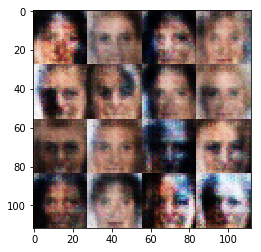

Epoch 0/1... Discriminator Loss: 1.1337... Generator Loss: 0.7637
Epoch 0/1... Discriminator Loss: 0.8470... Generator Loss: 1.5369
Epoch 0/1... Discriminator Loss: 1.1605... Generator Loss: 2.4040
Epoch 0/1... Discriminator Loss: 0.9474... Generator Loss: 1.2195
Epoch 0/1... Discriminator Loss: 1.0935... Generator Loss: 0.7992


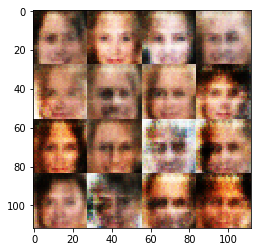

Epoch 0/1... Discriminator Loss: 1.0123... Generator Loss: 1.3819
Epoch 0/1... Discriminator Loss: 1.1728... Generator Loss: 1.1871
Epoch 0/1... Discriminator Loss: 1.4938... Generator Loss: 0.4595
Epoch 0/1... Discriminator Loss: 0.9627... Generator Loss: 1.6261
Epoch 0/1... Discriminator Loss: 0.9501... Generator Loss: 1.8329


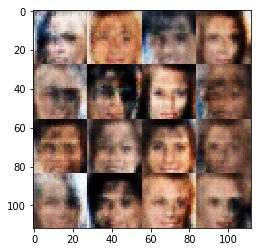

Epoch 0/1... Discriminator Loss: 1.2878... Generator Loss: 2.2431
Epoch 0/1... Discriminator Loss: 0.8338... Generator Loss: 1.7989
Epoch 0/1... Discriminator Loss: 1.1928... Generator Loss: 0.7186
Epoch 0/1... Discriminator Loss: 0.8475... Generator Loss: 1.6013
Epoch 0/1... Discriminator Loss: 1.3162... Generator Loss: 0.5607


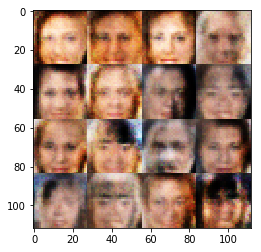

Epoch 0/1... Discriminator Loss: 1.0065... Generator Loss: 1.2148
Epoch 0/1... Discriminator Loss: 1.9306... Generator Loss: 0.2699
Epoch 0/1... Discriminator Loss: 1.1115... Generator Loss: 1.1888
Epoch 0/1... Discriminator Loss: 0.9110... Generator Loss: 1.0744
Epoch 0/1... Discriminator Loss: 1.0327... Generator Loss: 1.1290


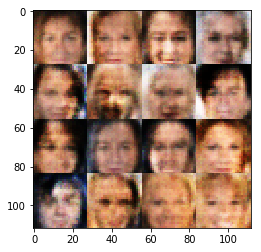

Epoch 0/1... Discriminator Loss: 1.4216... Generator Loss: 2.3633
Epoch 0/1... Discriminator Loss: 1.2302... Generator Loss: 0.6226
Epoch 0/1... Discriminator Loss: 1.3389... Generator Loss: 0.5141
Epoch 0/1... Discriminator Loss: 2.0876... Generator Loss: 0.2258
Epoch 0/1... Discriminator Loss: 1.0399... Generator Loss: 1.1148


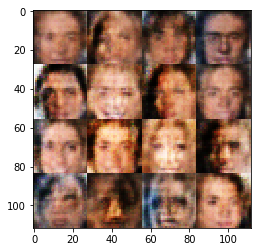

Epoch 0/1... Discriminator Loss: 0.8295... Generator Loss: 1.3248
Epoch 0/1... Discriminator Loss: 1.0342... Generator Loss: 0.9082
Epoch 0/1... Discriminator Loss: 1.0187... Generator Loss: 2.3103
Epoch 0/1... Discriminator Loss: 0.9498... Generator Loss: 1.7709
Epoch 0/1... Discriminator Loss: 0.7243... Generator Loss: 1.5048


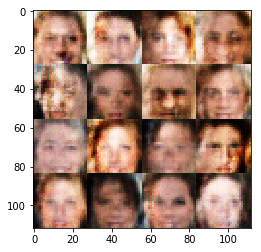

Epoch 0/1... Discriminator Loss: 1.1466... Generator Loss: 1.3284
Epoch 0/1... Discriminator Loss: 1.4071... Generator Loss: 0.5007
Epoch 0/1... Discriminator Loss: 1.2566... Generator Loss: 0.6140
Epoch 0/1... Discriminator Loss: 1.0970... Generator Loss: 0.7741
Epoch 0/1... Discriminator Loss: 1.4504... Generator Loss: 0.4788


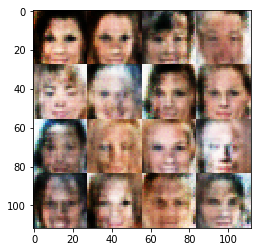

Epoch 0/1... Discriminator Loss: 1.2101... Generator Loss: 1.9799
Epoch 0/1... Discriminator Loss: 1.4436... Generator Loss: 0.4684
Epoch 0/1... Discriminator Loss: 0.8672... Generator Loss: 1.4142
Epoch 0/1... Discriminator Loss: 1.0581... Generator Loss: 1.0702
Epoch 0/1... Discriminator Loss: 1.4023... Generator Loss: 2.6891


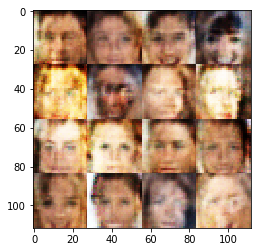

Epoch 0/1... Discriminator Loss: 1.0970... Generator Loss: 0.7859
Epoch 0/1... Discriminator Loss: 1.1154... Generator Loss: 1.5101
Epoch 0/1... Discriminator Loss: 0.9666... Generator Loss: 1.4279
Epoch 0/1... Discriminator Loss: 0.8835... Generator Loss: 1.5837
Epoch 0/1... Discriminator Loss: 1.1889... Generator Loss: 1.6029


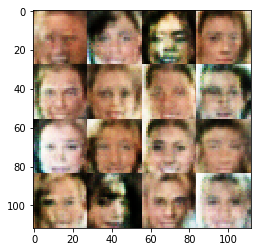

Epoch 0/1... Discriminator Loss: 1.0176... Generator Loss: 0.9258
Epoch 0/1... Discriminator Loss: 2.1497... Generator Loss: 3.2854
Epoch 0/1... Discriminator Loss: 1.1417... Generator Loss: 0.7570
Epoch 0/1... Discriminator Loss: 1.1234... Generator Loss: 2.0285
Epoch 0/1... Discriminator Loss: 0.8937... Generator Loss: 1.0183


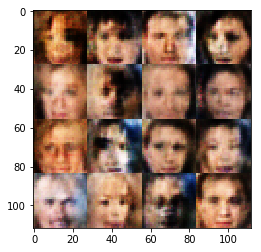

Epoch 0/1... Discriminator Loss: 1.1638... Generator Loss: 0.6793
Epoch 0/1... Discriminator Loss: 1.2706... Generator Loss: 0.5680
Epoch 0/1... Discriminator Loss: 0.9434... Generator Loss: 1.3894
Epoch 0/1... Discriminator Loss: 1.7848... Generator Loss: 0.3222
Epoch 0/1... Discriminator Loss: 1.4572... Generator Loss: 0.4824


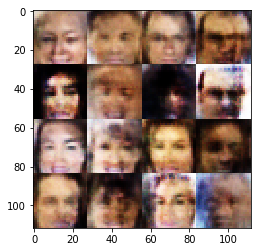

Epoch 0/1... Discriminator Loss: 1.2665... Generator Loss: 0.5948
Epoch 0/1... Discriminator Loss: 1.2413... Generator Loss: 0.6501
Epoch 0/1... Discriminator Loss: 1.1684... Generator Loss: 0.8403
Epoch 0/1... Discriminator Loss: 1.8886... Generator Loss: 0.2617
Epoch 0/1... Discriminator Loss: 1.0747... Generator Loss: 0.8292


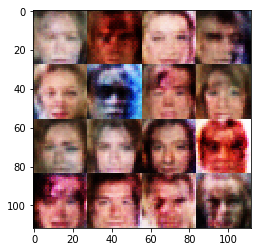

Epoch 0/1... Discriminator Loss: 1.2275... Generator Loss: 0.6081
Epoch 0/1... Discriminator Loss: 1.1039... Generator Loss: 1.0984
Epoch 0/1... Discriminator Loss: 0.9708... Generator Loss: 1.5935
Epoch 0/1... Discriminator Loss: 1.3366... Generator Loss: 0.6538
Epoch 0/1... Discriminator Loss: 1.0769... Generator Loss: 0.7968


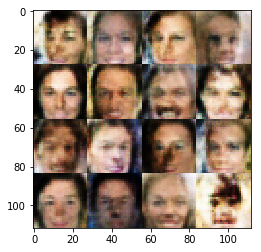

Epoch 0/1... Discriminator Loss: 1.2716... Generator Loss: 1.1831
Epoch 0/1... Discriminator Loss: 0.8450... Generator Loss: 1.2189
Epoch 0/1... Discriminator Loss: 0.9803... Generator Loss: 1.0251
Epoch 0/1... Discriminator Loss: 0.9986... Generator Loss: 1.5967
Epoch 0/1... Discriminator Loss: 1.2151... Generator Loss: 0.7615


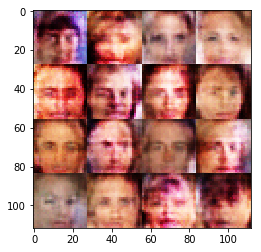

Epoch 0/1... Discriminator Loss: 1.2484... Generator Loss: 0.5709
Epoch 0/1... Discriminator Loss: 1.6171... Generator Loss: 0.3741
Epoch 0/1... Discriminator Loss: 0.8965... Generator Loss: 1.2039
Epoch 0/1... Discriminator Loss: 0.9689... Generator Loss: 1.8692
Epoch 0/1... Discriminator Loss: 0.8144... Generator Loss: 1.2791


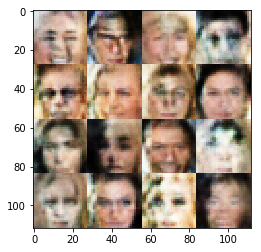

Epoch 0/1... Discriminator Loss: 1.2135... Generator Loss: 2.4292
Epoch 0/1... Discriminator Loss: 0.8848... Generator Loss: 1.3938
Epoch 0/1... Discriminator Loss: 1.2893... Generator Loss: 2.6357
Epoch 0/1... Discriminator Loss: 0.7769... Generator Loss: 1.2337
Epoch 0/1... Discriminator Loss: 1.5963... Generator Loss: 0.4104


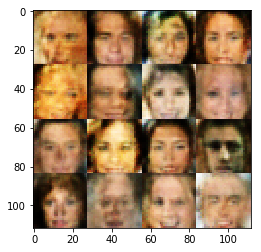

Epoch 0/1... Discriminator Loss: 1.7757... Generator Loss: 0.3088
Epoch 0/1... Discriminator Loss: 1.1494... Generator Loss: 0.7550
Epoch 0/1... Discriminator Loss: 1.4185... Generator Loss: 0.4935
Epoch 0/1... Discriminator Loss: 1.1184... Generator Loss: 0.7266
Epoch 0/1... Discriminator Loss: 0.8189... Generator Loss: 1.7185


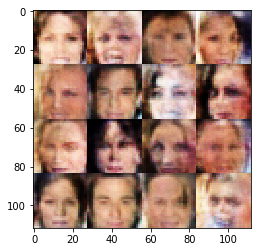

Epoch 0/1... Discriminator Loss: 1.0767... Generator Loss: 1.8280
Epoch 0/1... Discriminator Loss: 0.8891... Generator Loss: 1.7029
Epoch 0/1... Discriminator Loss: 0.8713... Generator Loss: 2.1362
Epoch 0/1... Discriminator Loss: 1.1996... Generator Loss: 0.6068
Epoch 0/1... Discriminator Loss: 1.7868... Generator Loss: 0.3155


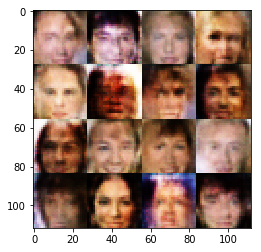

Epoch 0/1... Discriminator Loss: 1.2312... Generator Loss: 0.6368
Epoch 0/1... Discriminator Loss: 1.3461... Generator Loss: 0.5270
Epoch 0/1... Discriminator Loss: 1.0890... Generator Loss: 1.0901
Epoch 0/1... Discriminator Loss: 0.9711... Generator Loss: 1.1549
Epoch 0/1... Discriminator Loss: 0.9766... Generator Loss: 1.3482


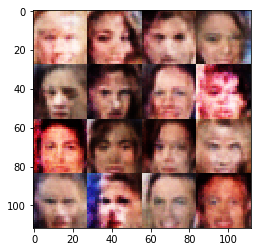

Epoch 0/1... Discriminator Loss: 1.1465... Generator Loss: 0.6538
Epoch 0/1... Discriminator Loss: 1.8856... Generator Loss: 0.2719
Epoch 0/1... Discriminator Loss: 1.1341... Generator Loss: 2.3225
Epoch 0/1... Discriminator Loss: 1.2316... Generator Loss: 1.9363
Epoch 0/1... Discriminator Loss: 1.1997... Generator Loss: 0.6819


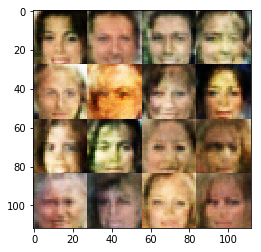

Epoch 0/1... Discriminator Loss: 0.9814... Generator Loss: 1.6921
Epoch 0/1... Discriminator Loss: 1.1119... Generator Loss: 1.5644
Epoch 0/1... Discriminator Loss: 0.8223... Generator Loss: 1.1597
Epoch 0/1... Discriminator Loss: 1.2991... Generator Loss: 2.4238
Epoch 0/1... Discriminator Loss: 0.8252... Generator Loss: 1.2790


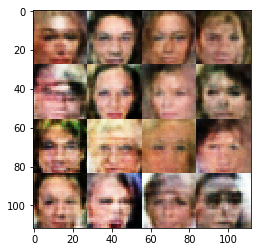

Epoch 0/1... Discriminator Loss: 1.6675... Generator Loss: 0.3647
Epoch 0/1... Discriminator Loss: 1.2652... Generator Loss: 0.6681
Epoch 0/1... Discriminator Loss: 0.8538... Generator Loss: 2.2939
Epoch 0/1... Discriminator Loss: 1.2335... Generator Loss: 0.6017
Epoch 0/1... Discriminator Loss: 1.1804... Generator Loss: 0.7235


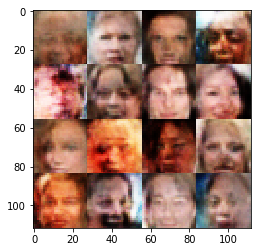

Epoch 0/1... Discriminator Loss: 1.1287... Generator Loss: 0.7293
Epoch 0/1... Discriminator Loss: 1.5558... Generator Loss: 0.4301
Epoch 0/1... Discriminator Loss: 0.8481... Generator Loss: 1.0986
Epoch 0/1... Discriminator Loss: 1.1146... Generator Loss: 1.8826
Epoch 0/1... Discriminator Loss: 0.8763... Generator Loss: 1.6031


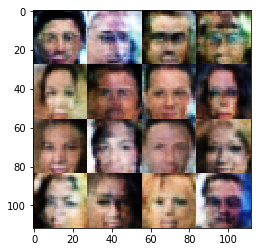

Epoch 0/1... Discriminator Loss: 1.0989... Generator Loss: 0.8326
Epoch 0/1... Discriminator Loss: 0.7460... Generator Loss: 1.4924
Epoch 0/1... Discriminator Loss: 0.9428... Generator Loss: 1.2975
Epoch 0/1... Discriminator Loss: 1.3194... Generator Loss: 0.5802
Epoch 0/1... Discriminator Loss: 1.1483... Generator Loss: 0.7292


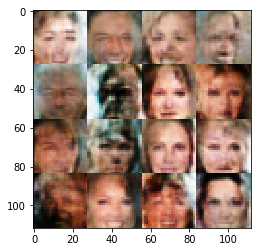

Epoch 0/1... Discriminator Loss: 0.7985... Generator Loss: 1.5848
Epoch 0/1... Discriminator Loss: 1.0419... Generator Loss: 0.7714
Epoch 0/1... Discriminator Loss: 1.0895... Generator Loss: 0.7756
Epoch 0/1... Discriminator Loss: 0.8969... Generator Loss: 2.1588
Epoch 0/1... Discriminator Loss: 1.2586... Generator Loss: 2.2310


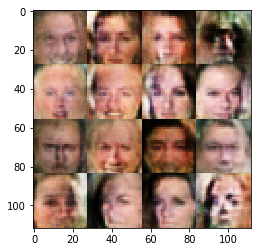

Epoch 0/1... Discriminator Loss: 1.0374... Generator Loss: 0.8779
Epoch 0/1... Discriminator Loss: 0.9402... Generator Loss: 0.9474
Epoch 0/1... Discriminator Loss: 0.7989... Generator Loss: 1.9116
Epoch 0/1... Discriminator Loss: 0.9976... Generator Loss: 1.0105
Epoch 0/1... Discriminator Loss: 1.0682... Generator Loss: 1.6663


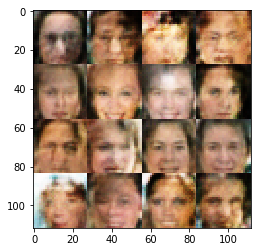

Epoch 0/1... Discriminator Loss: 1.8421... Generator Loss: 0.3371
Epoch 0/1... Discriminator Loss: 2.1214... Generator Loss: 0.2183
Epoch 0/1... Discriminator Loss: 1.1807... Generator Loss: 0.6891
Epoch 0/1... Discriminator Loss: 1.4489... Generator Loss: 2.2155
Epoch 0/1... Discriminator Loss: 1.4636... Generator Loss: 0.4472


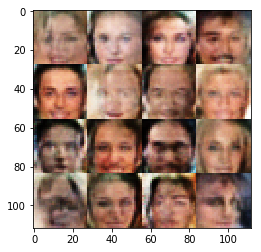

Epoch 0/1... Discriminator Loss: 0.9015... Generator Loss: 1.2150
Epoch 0/1... Discriminator Loss: 1.1630... Generator Loss: 0.6676
Epoch 0/1... Discriminator Loss: 1.2563... Generator Loss: 1.6823
Epoch 0/1... Discriminator Loss: 0.9732... Generator Loss: 1.5272
Epoch 0/1... Discriminator Loss: 0.7839... Generator Loss: 2.4371


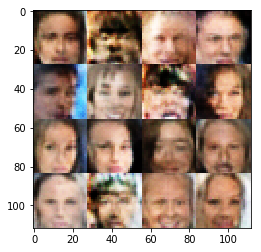

Epoch 0/1... Discriminator Loss: 0.6899... Generator Loss: 1.4199
Epoch 0/1... Discriminator Loss: 0.8662... Generator Loss: 1.7532
Epoch 0/1... Discriminator Loss: 1.0047... Generator Loss: 0.8640
Epoch 0/1... Discriminator Loss: 1.0915... Generator Loss: 1.5167
Epoch 0/1... Discriminator Loss: 1.1437... Generator Loss: 1.9070


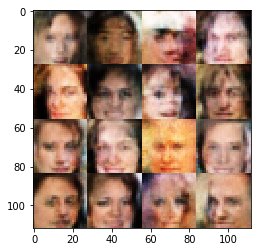

Epoch 0/1... Discriminator Loss: 0.7955... Generator Loss: 1.1917
Epoch 0/1... Discriminator Loss: 1.5188... Generator Loss: 2.9791
Epoch 0/1... Discriminator Loss: 0.9612... Generator Loss: 1.0544
Epoch 0/1... Discriminator Loss: 0.9177... Generator Loss: 2.1121
Epoch 0/1... Discriminator Loss: 0.9712... Generator Loss: 0.9562


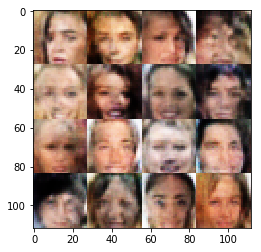

Epoch 0/1... Discriminator Loss: 1.1069... Generator Loss: 0.7984
Epoch 0/1... Discriminator Loss: 1.3863... Generator Loss: 0.4951
Epoch 0/1... Discriminator Loss: 1.2026... Generator Loss: 0.7138
Epoch 0/1... Discriminator Loss: 1.8518... Generator Loss: 0.2932
Epoch 0/1... Discriminator Loss: 0.9835... Generator Loss: 0.9848


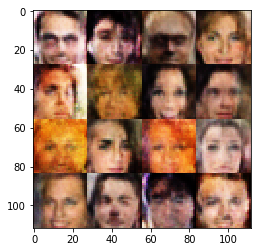

Epoch 0/1... Discriminator Loss: 1.1352... Generator Loss: 1.0710
Epoch 0/1... Discriminator Loss: 0.9502... Generator Loss: 1.3931
Epoch 0/1... Discriminator Loss: 0.9502... Generator Loss: 1.3163
Epoch 0/1... Discriminator Loss: 1.2612... Generator Loss: 2.4352
Epoch 0/1... Discriminator Loss: 1.4606... Generator Loss: 0.4330


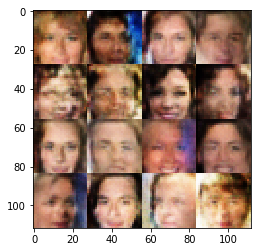

Epoch 0/1... Discriminator Loss: 1.1856... Generator Loss: 0.6451
Epoch 0/1... Discriminator Loss: 0.9010... Generator Loss: 1.0427
Epoch 0/1... Discriminator Loss: 0.9648... Generator Loss: 0.9245
Epoch 0/1... Discriminator Loss: 0.8721... Generator Loss: 1.5486
Epoch 0/1... Discriminator Loss: 1.1657... Generator Loss: 2.1305


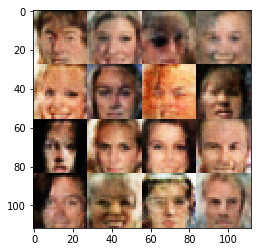

Epoch 0/1... Discriminator Loss: 1.0646... Generator Loss: 1.5144
Epoch 0/1... Discriminator Loss: 0.7504... Generator Loss: 1.5154
Epoch 0/1... Discriminator Loss: 1.3348... Generator Loss: 0.5676
Epoch 0/1... Discriminator Loss: 0.9934... Generator Loss: 1.2556
Epoch 0/1... Discriminator Loss: 1.0653... Generator Loss: 1.5608


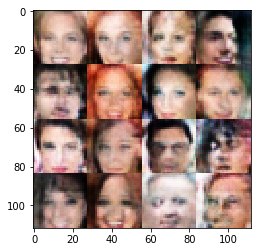

Epoch 0/1... Discriminator Loss: 0.7609... Generator Loss: 1.2635
Epoch 0/1... Discriminator Loss: 1.0225... Generator Loss: 0.8537
Epoch 0/1... Discriminator Loss: 1.0231... Generator Loss: 0.8676
Epoch 0/1... Discriminator Loss: 1.2441... Generator Loss: 0.6048
Epoch 0/1... Discriminator Loss: 1.3759... Generator Loss: 0.4955


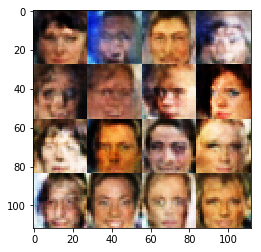

Epoch 0/1... Discriminator Loss: 0.9272... Generator Loss: 1.1163
Epoch 0/1... Discriminator Loss: 0.9523... Generator Loss: 1.0641
Epoch 0/1... Discriminator Loss: 0.9997... Generator Loss: 1.7564
Epoch 0/1... Discriminator Loss: 1.1255... Generator Loss: 1.1007
Epoch 0/1... Discriminator Loss: 1.2525... Generator Loss: 0.5553


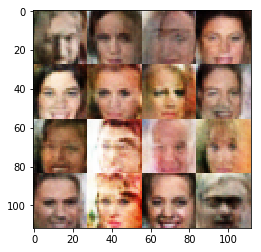

Epoch 0/1... Discriminator Loss: 0.8275... Generator Loss: 1.8784
Epoch 0/1... Discriminator Loss: 0.6140... Generator Loss: 1.8799
Epoch 0/1... Discriminator Loss: 0.8770... Generator Loss: 1.2533
Epoch 0/1... Discriminator Loss: 1.5398... Generator Loss: 0.4595
Epoch 0/1... Discriminator Loss: 1.1573... Generator Loss: 0.7199


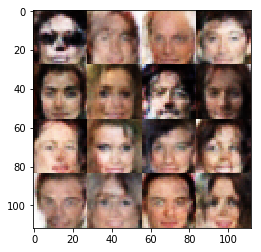

Epoch 0/1... Discriminator Loss: 1.5160... Generator Loss: 0.4284
Epoch 0/1... Discriminator Loss: 0.7676... Generator Loss: 1.6158
Epoch 0/1... Discriminator Loss: 0.8762... Generator Loss: 1.1765
Epoch 0/1... Discriminator Loss: 0.8395... Generator Loss: 1.5059
Epoch 0/1... Discriminator Loss: 1.2572... Generator Loss: 1.2983


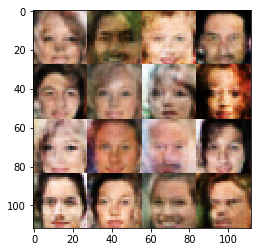

Epoch 0/1... Discriminator Loss: 1.0031... Generator Loss: 0.9318
Epoch 0/1... Discriminator Loss: 0.7644... Generator Loss: 1.5580
Epoch 0/1... Discriminator Loss: 1.8282... Generator Loss: 0.2938
Epoch 0/1... Discriminator Loss: 1.0672... Generator Loss: 0.8104
Epoch 0/1... Discriminator Loss: 1.1238... Generator Loss: 0.7819


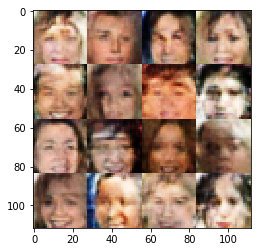

Epoch 0/1... Discriminator Loss: 0.9122... Generator Loss: 1.4971
Epoch 0/1... Discriminator Loss: 1.4038... Generator Loss: 0.4833
Epoch 0/1... Discriminator Loss: 1.0441... Generator Loss: 0.9218
Epoch 0/1... Discriminator Loss: 1.1392... Generator Loss: 0.7373
Epoch 0/1... Discriminator Loss: 1.1320... Generator Loss: 0.6930


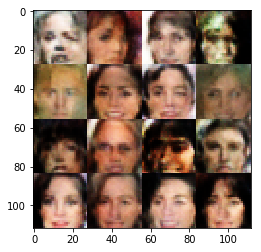

Epoch 0/1... Discriminator Loss: 0.9910... Generator Loss: 1.2076
Epoch 0/1... Discriminator Loss: 0.9394... Generator Loss: 1.2354
Epoch 0/1... Discriminator Loss: 1.0709... Generator Loss: 0.7829
Epoch 0/1... Discriminator Loss: 1.3659... Generator Loss: 0.5614
Epoch 0/1... Discriminator Loss: 0.9275... Generator Loss: 1.3830


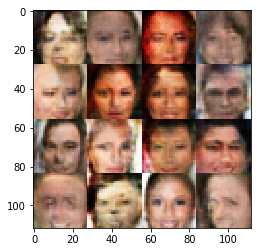

Epoch 0/1... Discriminator Loss: 1.5021... Generator Loss: 0.4429
Epoch 0/1... Discriminator Loss: 1.2521... Generator Loss: 0.6334
Epoch 0/1... Discriminator Loss: 1.4525... Generator Loss: 2.1166
Epoch 0/1... Discriminator Loss: 1.0482... Generator Loss: 1.2952
Epoch 0/1... Discriminator Loss: 1.1573... Generator Loss: 1.0115


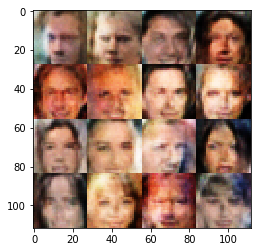

Epoch 0/1... Discriminator Loss: 1.0427... Generator Loss: 0.7962
Epoch 0/1... Discriminator Loss: 0.8498... Generator Loss: 1.1018
Epoch 0/1... Discriminator Loss: 0.9126... Generator Loss: 0.9561
Epoch 0/1... Discriminator Loss: 0.9344... Generator Loss: 1.0090
Epoch 0/1... Discriminator Loss: 1.1849... Generator Loss: 0.7013


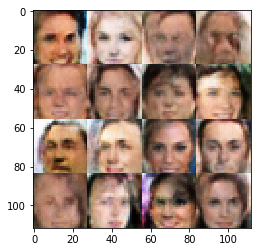

Epoch 0/1... Discriminator Loss: 0.9558... Generator Loss: 1.2824
Epoch 0/1... Discriminator Loss: 1.1276... Generator Loss: 0.7356
Epoch 0/1... Discriminator Loss: 1.6294... Generator Loss: 0.3876
Epoch 0/1... Discriminator Loss: 1.4329... Generator Loss: 0.4476
Epoch 0/1... Discriminator Loss: 1.2020... Generator Loss: 0.6417


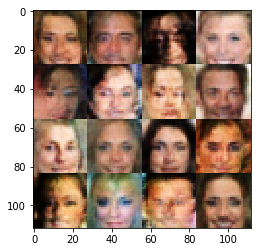

Epoch 0/1... Discriminator Loss: 1.1589... Generator Loss: 1.8907
Epoch 0/1... Discriminator Loss: 0.9251... Generator Loss: 1.1937
Epoch 0/1... Discriminator Loss: 1.7137... Generator Loss: 0.3634
Epoch 0/1... Discriminator Loss: 0.6697... Generator Loss: 1.6299
Epoch 0/1... Discriminator Loss: 0.7265... Generator Loss: 1.3397


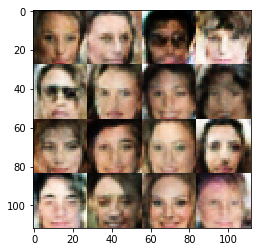

Epoch 0/1... Discriminator Loss: 1.1001... Generator Loss: 0.7427
Epoch 0/1... Discriminator Loss: 0.9831... Generator Loss: 1.5213
Epoch 0/1... Discriminator Loss: 1.7351... Generator Loss: 0.3252
Epoch 0/1... Discriminator Loss: 1.2303... Generator Loss: 0.6114
Epoch 0/1... Discriminator Loss: 2.0264... Generator Loss: 0.2469


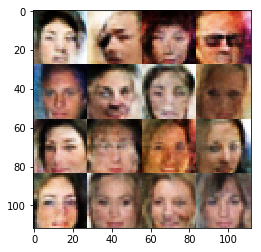

Epoch 0/1... Discriminator Loss: 1.0503... Generator Loss: 1.1310
Epoch 0/1... Discriminator Loss: 1.3750... Generator Loss: 0.5168
Epoch 0/1... Discriminator Loss: 1.4943... Generator Loss: 0.4700
Epoch 0/1... Discriminator Loss: 1.5705... Generator Loss: 0.3818
Epoch 0/1... Discriminator Loss: 1.2565... Generator Loss: 0.5817


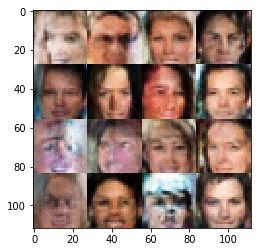

Epoch 0/1... Discriminator Loss: 0.9623... Generator Loss: 0.9524
Epoch 0/1... Discriminator Loss: 1.0210... Generator Loss: 2.0859
Epoch 0/1... Discriminator Loss: 1.8213... Generator Loss: 0.2882
Epoch 0/1... Discriminator Loss: 1.1018... Generator Loss: 0.7604
Epoch 0/1... Discriminator Loss: 1.1995... Generator Loss: 0.6235


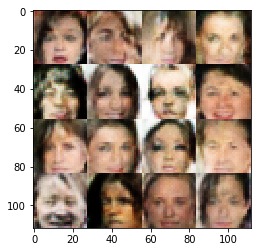

Epoch 0/1... Discriminator Loss: 1.4193... Generator Loss: 0.4884
Epoch 0/1... Discriminator Loss: 0.7296... Generator Loss: 1.5844
Epoch 0/1... Discriminator Loss: 1.1188... Generator Loss: 0.7173
Epoch 0/1... Discriminator Loss: 1.3084... Generator Loss: 0.5464
Epoch 0/1... Discriminator Loss: 1.5371... Generator Loss: 0.4064


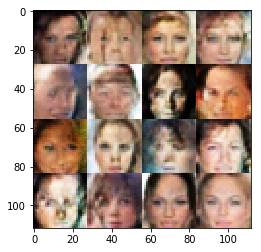

Epoch 0/1... Discriminator Loss: 1.0740... Generator Loss: 0.7257
Epoch 0/1... Discriminator Loss: 1.0475... Generator Loss: 0.9865
Epoch 0/1... Discriminator Loss: 0.9944... Generator Loss: 0.9345
Epoch 0/1... Discriminator Loss: 1.5980... Generator Loss: 0.3943
Epoch 0/1... Discriminator Loss: 1.4180... Generator Loss: 0.4715


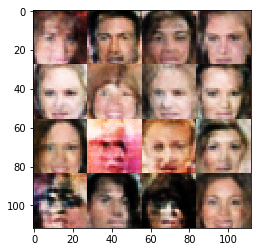

Epoch 0/1... Discriminator Loss: 1.0106... Generator Loss: 1.0011
Epoch 0/1... Discriminator Loss: 1.2096... Generator Loss: 0.6247
Epoch 0/1... Discriminator Loss: 2.3278... Generator Loss: 0.1766
Epoch 0/1... Discriminator Loss: 0.7565... Generator Loss: 1.8565
Epoch 0/1... Discriminator Loss: 1.2211... Generator Loss: 0.6684


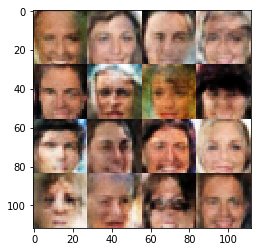

Epoch 0/1... Discriminator Loss: 1.0631... Generator Loss: 1.1389
Epoch 0/1... Discriminator Loss: 0.9180... Generator Loss: 1.1678
Epoch 0/1... Discriminator Loss: 0.9615... Generator Loss: 0.9418
Epoch 0/1... Discriminator Loss: 0.9806... Generator Loss: 1.0404
Epoch 0/1... Discriminator Loss: 0.9768... Generator Loss: 0.9599


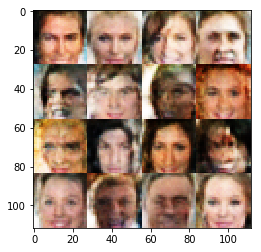

Epoch 0/1... Discriminator Loss: 1.0605... Generator Loss: 0.8231
Epoch 0/1... Discriminator Loss: 1.1412... Generator Loss: 0.6851
Epoch 0/1... Discriminator Loss: 1.3118... Generator Loss: 1.5808
Epoch 0/1... Discriminator Loss: 1.2581... Generator Loss: 0.6034
Epoch 0/1... Discriminator Loss: 0.9237... Generator Loss: 1.0946


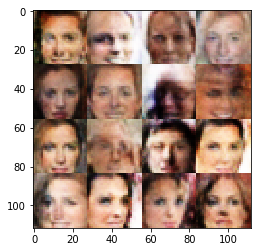

Epoch 0/1... Discriminator Loss: 1.0558... Generator Loss: 0.9385
Epoch 0/1... Discriminator Loss: 1.1000... Generator Loss: 1.0697
Epoch 0/1... Discriminator Loss: 1.1343... Generator Loss: 0.7454
Epoch 0/1... Discriminator Loss: 1.4619... Generator Loss: 1.6240
Epoch 0/1... Discriminator Loss: 1.5793... Generator Loss: 0.4092


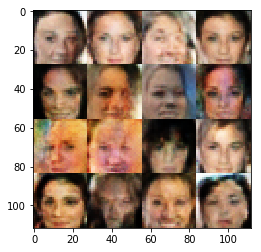

In [ ]:
batch_size = 64
z_dim = 128
learning_rate = .0003
beta1 = .3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.